In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
d = pd.read_csv('../music/KharagpurClimateData.csv')

In [2]:
# Load data for different cities
maldah_data = pd.read_csv('../music/Maldah_data.csv')
murshidabad_data = pd.read_csv('../music/Murshidabad_data.csv')
nadia_data = pd.read_csv('../music/Nadia_data.csv')
calcutta_data = pd.read_csv('../music/Calcutta_data.csv')
medinipur_data = pd.read_csv('../music/Medinipur_data.csv')
bankura_data = pd.read_csv('../music/Bankura_data.csv')
birbhum_data = pd.read_csv('../music/Birbhum_data.csv')

In [3]:
# Barddhaman coordinates
barddhaman_coords = (23.2324, 87.865)

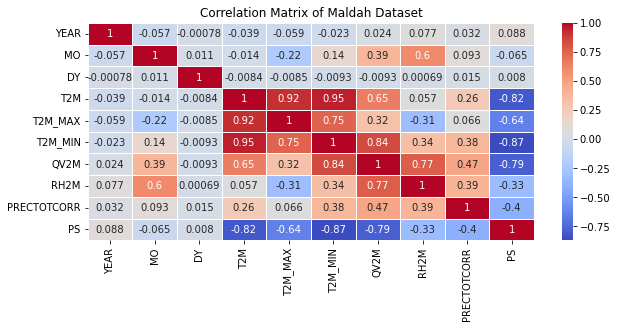

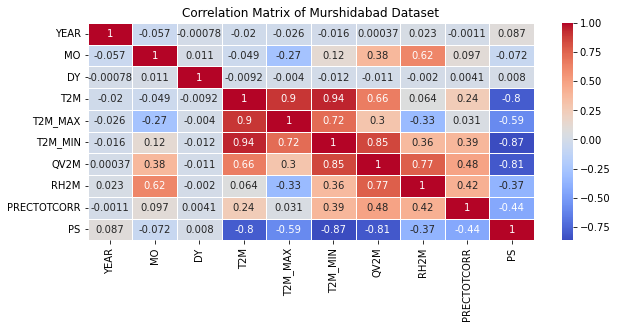

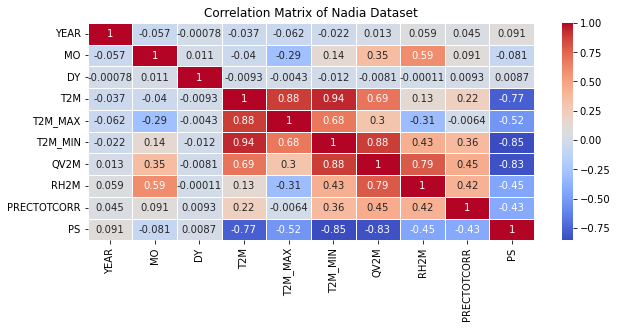

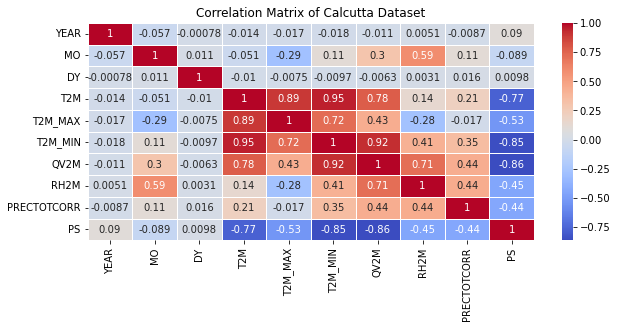

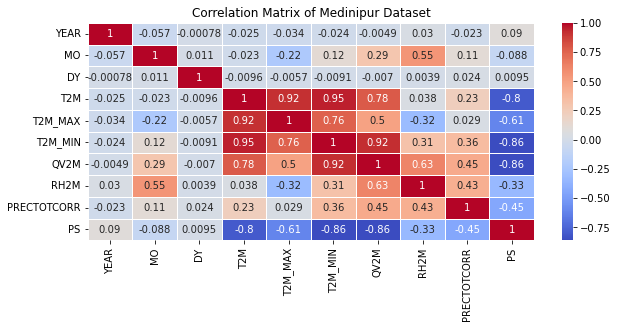

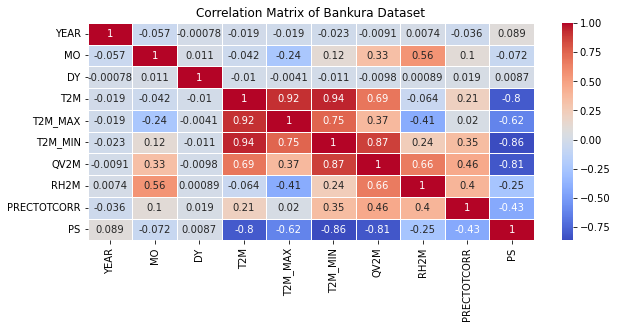

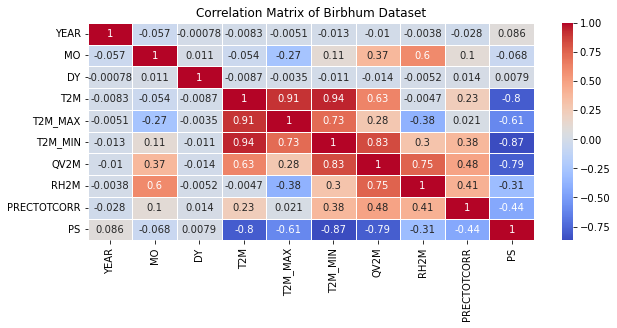

In [4]:
import seaborn as sns
# Combine all city data into a single DataFrame
city_data = {
    'Maldah': maldah_data,
    'Murshidabad': murshidabad_data,
    'Nadia': nadia_data,
    'Calcutta': calcutta_data,
    'Medinipur': medinipur_data,
    'Bankura': bankura_data,
    'Birbhum': birbhum_data
}


# Generate correlation matrix for each city
for city, data in city_data.items():
    correlation_matrix = data.corr()
    
    # Create a heatmap to visualize the correlation matrix
    plt.figure(figsize=(10, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Matrix of {city} Dataset')
    plt.show()


In [66]:
import pandas as pd

# Select relevant features for interpolation
features = ["YEAR", "MO", "DY", "T2M", "T2M_MAX", "T2M_MIN", "QV2M", "RH2M", "PRECTOTCORR", "PS"]

# Combine data from all cities
all_cities_data = pd.concat([maldah_data, murshidabad_data, nadia_data, calcutta_data, medinipur_data, bankura_data, birbhum_data], ignore_index=True)

In [67]:
# Feature matrix and target variable
X = all_cities_data[features]
y = all_cities_data["T2M_MAX"]  # You can choose any other target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X_scaled)

# Train linear regression model
model = LinearRegression()
model.fit(X_imputed, y)

LinearRegression()

In [68]:
# Iterate over each city and save the interpolated data for Barddhaman
for city_name, city_data in zip(["Maldah", "Murshidabad", "Nadia", "Calcutta", "Medinipur", "Bankura", "Birbhum"], 
                                [maldah_data, murshidabad_data, nadia_data, calcutta_data, medinipur_data, bankura_data, birbhum_data]):
    # Predict T2M_MAX for Barddhaman for all rows
    barddhaman_data_all_rows = pd.DataFrame(columns=features)
    barddhaman_data_all_rows[features] = city_data[features]  # Copy features from existing data

    # Impute missing values for Barddhaman
    barddhaman_data_all_rows_imputed = imputer.transform(scaler.transform(barddhaman_data_all_rows[features]))

    # Predict T2M_MAX for Barddhaman
    barddhaman_data_all_rows["T2M_MAX"] = model.predict(barddhaman_data_all_rows_imputed)

    # Save interpolated data for Barddhaman to a new CSV file
    barddhaman_data_all_rows.to_csv(f"Barddhaman_{city_name}_interpolated_data.csv", index=False)
    print(f"Interpolated data for Barddhaman based on {city_name} saved to 'Barddhaman_{city_name}_interpolated_data.csv'")

barddhaman_data_all_rows.to_csv("Barddhaman_interpolated_data.csv", index=False)

Interpolated data for Barddhaman based on Maldah saved to 'Barddhaman_Maldah_interpolated_data.csv'
Interpolated data for Barddhaman based on Murshidabad saved to 'Barddhaman_Murshidabad_interpolated_data.csv'
Interpolated data for Barddhaman based on Nadia saved to 'Barddhaman_Nadia_interpolated_data.csv'
Interpolated data for Barddhaman based on Calcutta saved to 'Barddhaman_Calcutta_interpolated_data.csv'
Interpolated data for Barddhaman based on Medinipur saved to 'Barddhaman_Medinipur_interpolated_data.csv'
Interpolated data for Barddhaman based on Bankura saved to 'Barddhaman_Bankura_interpolated_data.csv'
Interpolated data for Barddhaman based on Birbhum saved to 'Barddhaman_Birbhum_interpolated_data.csv'


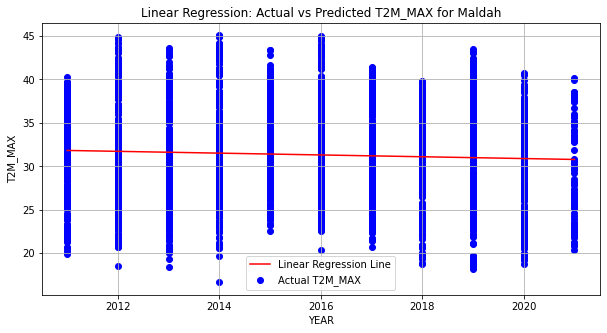

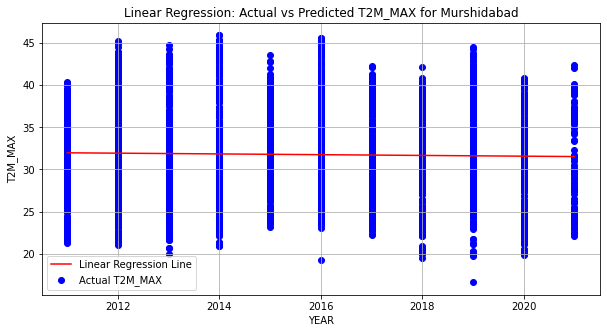

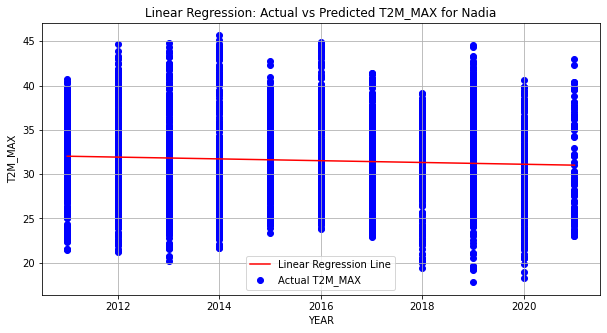

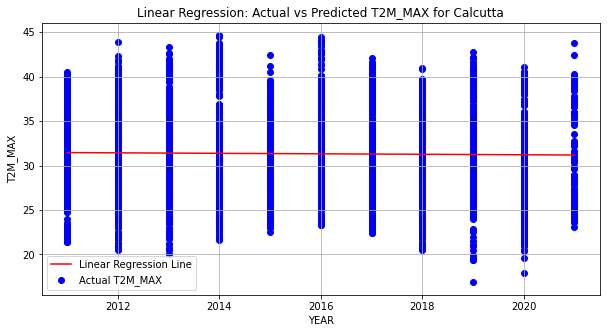

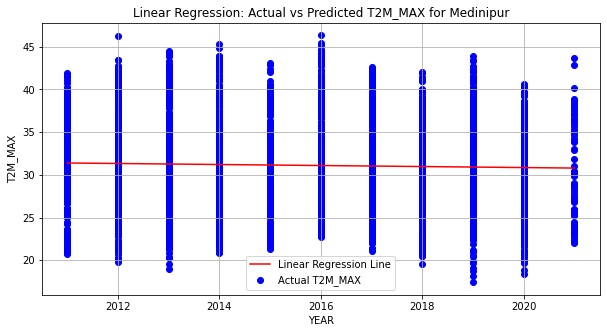

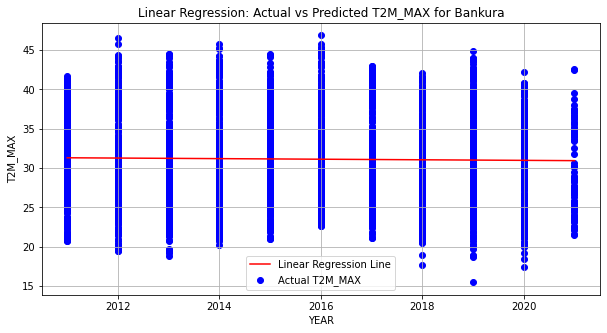

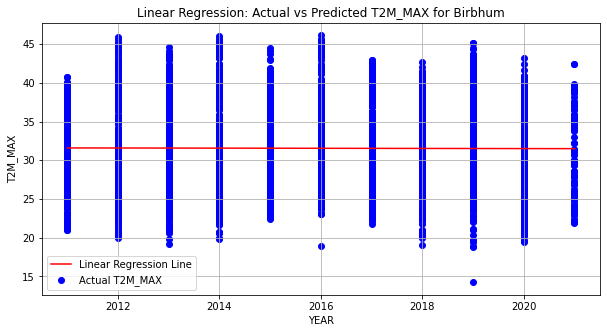

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read actual and predicted data for each city
cities = ["Maldah", "Murshidabad", "Nadia", "Calcutta", "Medinipur", "Bankura", "Birbhum"]
actual_data = {}
predicted_data = {}

for city in cities:
    actual_data[city] = pd.read_csv(f'{city}_data.csv')
    predicted_data[city] = pd.read_csv(f'Barddhaman_{city}_interpolated_data.csv')

# Plot authentic linear regression graphs for each city
for city in cities:
    # Extract features and target variable
    X_actual = actual_data[city][['YEAR']]
    y_actual = actual_data[city]['T2M_MAX']

    X_predicted = predicted_data[city][['YEAR']]
    y_predicted = predicted_data[city]['T2M_MAX']

    # Fit linear regression model to actual data
    model = LinearRegression()
    model.fit(X_actual, y_actual)

    # Predicted values using the model
    y_pred = model.predict(X_predicted)

    # Plot actual data points and regression line
    plt.figure(figsize=(10, 5))
    plt.scatter(X_actual, y_actual, color='blue', label='Actual T2M_MAX')
    plt.plot(X_predicted, y_pred, color='red', label='Linear Regression Line')
    plt.title(f'Linear Regression: Actual vs Predicted T2M_MAX for {city}')
    plt.xlabel('YEAR')
    plt.ylabel('T2M_MAX')
    plt.legend()
    plt.grid(True)
    plt.show()


In [70]:
# Load the interpolated data for Barddhaman from each city
maldah_barddhaman_data = pd.read_csv("Barddhaman_Maldah_interpolated_data.csv")
murshidabad_barddhaman_data = pd.read_csv("Barddhaman_Murshidabad_interpolated_data.csv")
nadia_barddhaman_data = pd.read_csv("Barddhaman_Nadia_interpolated_data.csv")
calcutta_barddhaman_data = pd.read_csv("Barddhaman_Calcutta_interpolated_data.csv")
medinipur_barddhaman_data = pd.read_csv("Barddhaman_Medinipur_interpolated_data.csv")
bankura_barddhaman_data = pd.read_csv("Barddhaman_Bankura_interpolated_data.csv")
birbhum_barddhaman_data = pd.read_csv("Barddhaman_Birbhum_interpolated_data.csv")

In [71]:
# Calculate the weighted average of the values for each feature across the seven datasets
weighted_average_data = (
    maldah_barddhaman_data.set_index('YEAR') * (1/7) +
    murshidabad_barddhaman_data.set_index('YEAR') * (1/7) +
    nadia_barddhaman_data.set_index('YEAR') * (1/7) +
    calcutta_barddhaman_data.set_index('YEAR') * (1/7) +
    medinipur_barddhaman_data.set_index('YEAR') * (1/7) +
    bankura_barddhaman_data.set_index('YEAR') * (1/7) +
    birbhum_barddhaman_data.set_index('YEAR') * (1/7)
)

In [72]:
# Reset the index
weighted_average_data.reset_index(inplace=True)

# Save the combined weighted average data to a new CSV file
weighted_average_data.to_csv("Barddhaman_weighted_average_data.csv", index=False)

print("Combined weighted average data for Barddhaman saved to 'Barddhaman_weighted_average_data.csv'")

Combined weighted average data for Barddhaman saved to 'Barddhaman_weighted_average_data.csv'


In [74]:
# Load interpolated data for Barddhaman
barddhaman_interpolated_data = pd.read_csv("Barddhaman_weighted_average_data.csv")
# Load actual data for Barddhaman
barddhaman_actual_data = pd.read_csv('../music/Barddhaman_data.csv')

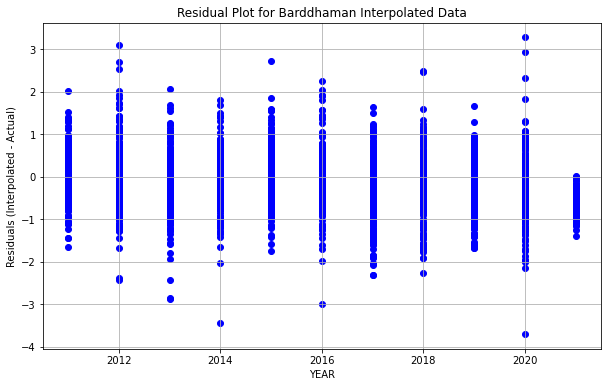

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Load interpolated data for Barddhaman
barddhaman_interpolated_data = pd.read_csv("Barddhaman_weighted_average_data.csv")
# Load actual data for Barddhaman
barddhaman_actual_data = pd.read_csv('../music/Barddhaman_data.csv')

# Extract years and actual T2M_MAX values
years_actual = barddhaman_actual_data['YEAR']
t2m_max_actual = barddhaman_actual_data['T2M_MAX']

# Extract years and interpolated T2M_MAX values
years_interpolated = barddhaman_interpolated_data['YEAR']
t2m_max_interpolated = barddhaman_interpolated_data['T2M_MAX']

# Calculate residuals
residuals = t2m_max_interpolated - t2m_max_actual

# Plot residual plot
plt.figure(figsize=(10, 6))
plt.scatter(years_actual, residuals, color='blue')
plt.title('Residual Plot for Barddhaman Interpolated Data')
plt.xlabel('YEAR')
plt.ylabel('Residuals (Interpolated - Actual)')
plt.grid(True)
plt.show()


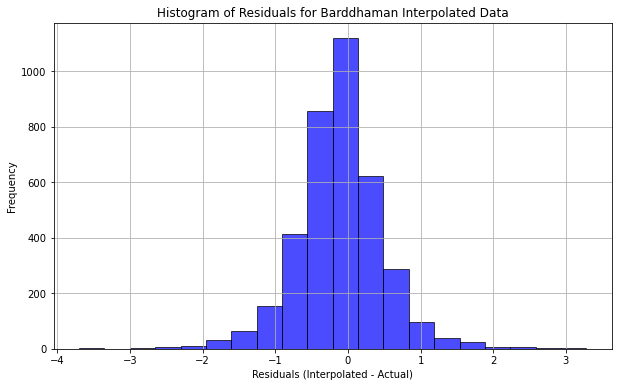

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Load interpolated data for Barddhaman
barddhaman_interpolated_data = pd.read_csv("Barddhaman_weighted_average_data.csv")
# Load actual data for Barddhaman
barddhaman_actual_data = pd.read_csv('../music/Barddhaman_data.csv')

# Extract years and actual T2M_MAX values
years_actual = barddhaman_actual_data['YEAR']
t2m_max_actual = barddhaman_actual_data['T2M_MAX']

# Extract years and interpolated T2M_MAX values
years_interpolated = barddhaman_interpolated_data['YEAR']
t2m_max_interpolated = barddhaman_interpolated_data['T2M_MAX']

# Calculate residuals
residuals = t2m_max_interpolated - t2m_max_actual

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals for Barddhaman Interpolated Data')
plt.xlabel('Residuals (Interpolated - Actual)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [75]:
from sklearn.metrics import r2_score
# Load the actual data of Barddhaman
actual_barddhaman_data = pd.read_csv("Barddhaman_data.csv")  # Replace with the actual file path

# Load the averaged interpolated data of Barddhaman
averaged_barddhaman_data = pd.read_csv("Barddhaman_weighted_average_data.csv")

# Merge the actual and interpolated data on the 'YEAR' column
merged_data = pd.merge(actual_barddhaman_data, averaged_barddhaman_data, on='YEAR', suffixes=('_actual', '_interpolated'))

# Calculate the RMSE value
rmse = np.sqrt(mean_squared_error(merged_data['T2M_MAX_actual'], merged_data['T2M_MAX_interpolated']))
# Calculate R^2 value
r2 = r2_score(merged_data['T2M_MAX_actual'], merged_data['T2M_MAX_interpolated'])

print("Root Mean Squared Error (RMSE) value:", rmse)
print("Coefficient of Determination (R^2) value:", r2)

Root Mean Squared Error (RMSE) value: 7.209064378227557
Coefficient of Determination (R^2) value: -0.9536937462625199
